In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx

import matplotlib.pyplot as plt

In [2]:
NER = spacy.load('it_core_news_sm')

In [3]:
#NOW WE'RE READY TO BEGIN WITH NAMED ENTITY RECOGNITION
#*STEPS*
#Tokenize the script into a list of sentences. Label each sentence by the label of the characters
#Define the window size, i.e. how far two sentences are apart from each other. We propose here a network visualization in which each character is represented by a node connected with the characters that appear in the same scenes. 
# Resuming: 
#Two characters are connected if they appear in the same scene.
#Their size and color intensity are proportional to their weighted degree (degree=number of connections)
#The ‘network density’ measures how close the graph is to complete. A complete graph (100%) has all possible edges between its nodes.

In [4]:
script= 'data/FiloAct3.txt'
script_text = open(script, encoding='utf-8').read()
script_doc = NER(script_text)

In [5]:
# quick test - identified entities
displacy.render(script_doc[0:2000], style="ent", jupyter=True)

In [6]:
# Read characters
character_df = pd.read_csv("data/characters.csv")
#character_df

In [7]:
import re 
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]", "", x)) 
character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ', 1)[0])

In [8]:
sent_entity_df = []

# Loop through sentences, store named entity list for each sentence
for sent in script_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)

In [9]:
sent_entity_df


,sentence,entities
0,"(﻿, \n, ATTO, TERZO)",[ATTO]
1,"(La, medesima, scena, degli, atti, precedenti, .)",[]
2,"(Fiori, un, po’, dappertutto, .)",[]
3,"(Non, mancano, cesti, ben, confezionati, con, ...",[]
4,"(I, fiori, saranno, di, colore, delicato, ,, n...",[]
...,...,...
399,"(Il, volto, le, si, riga, di, lacrime, come, a...",[]
400,"(Domenico, preoccupato, le, si, avvicina, ), F...","[Domenico, Filomena]"
401,"(FILOMENA, (, Felice, ), Domenico, ,, sto, pia...","[FILOMENA, Felice, Domenico, DOMENICO, Stringe..."
402,"(Hai, corso, …, hai, corso, …, hai, avuto, pau...","[Hai, Riposati!..., Hai, Filomena]"


In [10]:
# Function to filter out non-character entities
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list 
            if ent in list(character_df.character) 
            or ent in list(character_df.character_firstname)]

In [11]:
filter_entity(["Filomena", "Thu", "2"], character_df)

['Filomena']

In [12]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

# Filter out sentences that don't have any character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

,sentence,entities,character_entities
9,"(Rosalia, entra, dal, fondo, a, destra, in, ab...",[Rosalia],[Rosalia]
10,"(Contemporaneamente, dallo, studio, entra, Dom...",[Domenico],[Domenico]
18,"(ROSALIA, Sono, adnata, a, fare, una, commissi...",[Filomena],[Filomena]
26,"((, Guardando, con, circospezione, verso, la, ...","[Guardando, Filomena, Filomena]","[Filomena, Filomena]"
42,"(DOMENICO, (, Un, poco, infastidito, dalla, ci...","[DOMENICO, Rosalia, Rosalia, Filomena]","[Rosalia, Rosalia, Filomena]"
52,"(E, lo, sappiamo, io, e, donna, Filomena, .)",[Filomena],[Filomena]
56,"((, Ed, esce, a, sinistra, ), DOMENICO, (, Rim...","[DOMENICO, po’, E va bene!, SECONDA, MICHELE, ...","[Umberto, Riccardo, Michele]"
73,"(DOMENICO, Appena, mi, avete, visto, …, (, A, ...","[DOMENICO Appena, Michele]",[Michele]
75,"(DOMENICO, (, A, Riccardo, ), E, tu, sei, arri...","[DOMENICO, Riccardo]",[Riccardo]
84,"(Filomena, non, ha, voluto, nessuno, .)",[Filomena],[Filomena]


In [13]:
# Take only first name of characters
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
                                                                                                               for item in x])


C:\Users\Eleonora\AppData\Local\Temp\ipykernel_4400\1239962011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


In [14]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

,sentence,entities,character_entities
9,"(Rosalia, entra, dal, fondo, a, destra, in, ab...",[Rosalia],[Rosalia]
10,"(Contemporaneamente, dallo, studio, entra, Dom...",[Domenico],[Domenico]
18,"(ROSALIA, Sono, adnata, a, fare, una, commissi...",[Filomena],[Filomena]
26,"((, Guardando, con, circospezione, verso, la, ...","[Guardando, Filomena, Filomena]","[Filomena, Filomena]"
42,"(DOMENICO, (, Un, poco, infastidito, dalla, ci...","[DOMENICO, Rosalia, Rosalia, Filomena]","[Rosalia, Rosalia, Filomena]"
...,...,...,...
390,"(I, TRE, (, Uscendo, seguiti, da, Alfredo, ,, ...","[Uscendo, Alfredo, Rosalia, Lucia]","[Alfredo, Rosalia, Lucia]"
391,"(Domenico, li, ha, seguiti, con, lo, sguardo, ...",[Domenico],[Domenico]
400,"(Domenico, preoccupato, le, si, avvicina, ), F...","[Domenico, Filomena]","[Domenico, Filomena]"
401,"(FILOMENA, (, Felice, ), Domenico, ,, sto, pia...","[FILOMENA, Felice, Domenico, DOMENICO, Stringe...",[Domenico]


In [15]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [16]:
relationship_df = pd.DataFrame(relationships)

In [17]:
pd.set_option('display.max_rows', None)
relationship_df

,source,target
0,Rosalia,Domenico
1,Rosalia,Domenico
2,Rosalia,Domenico
3,Rosalia,Domenico
4,Rosalia,Domenico
5,Rosalia,Filomena
6,Rosalia,Filomena
7,Rosalia,Filomena
8,Rosalia,Filomena
9,Rosalia,Filomena


In [18]:
# Sort the cases with a->b and b->a
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df

,source,target
0,Domenico,Rosalia
1,Domenico,Rosalia
2,Domenico,Rosalia
3,Domenico,Rosalia
4,Domenico,Rosalia
5,Filomena,Rosalia
6,Filomena,Rosalia
7,Filomena,Rosalia
8,Filomena,Rosalia
9,Filomena,Rosalia


In [19]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [20]:
relationship_df

,source,target,value
0,Domenico,Rosalia,5
1,Filomena,Rosalia,13
2,Filomena,Umberto,2
3,Riccardo,Umberto,16
4,Michele,Riccardo,23
5,Domenico,Filomena,25
6,Domenico,Riccardo,6
7,Michele,Umberto,17
8,Rosalia,Teresina,6
9,Lucia,Rosalia,16


In [21]:
#relationship_df.to_csv
relationship_df.to_csv('output.csv', index=False, encoding='utf-8')

In [22]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

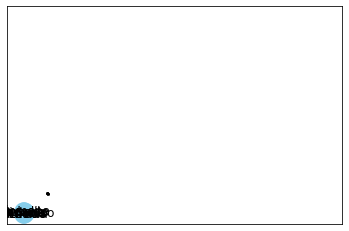

In [23]:

plt.rcParams["figure.figsize"] = (5,5)
pos = nx.circular_layout(G)
nx.draw_networkx(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()


#plt.rcParams["figure.figsize"] = (10,8)

In [24]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#ffffff', font_color='black')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("Filumena.html")

Filumena.html


In [25]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict
#number of times the circles touches the edges is the degree
#in the dictionary we see that gandalf should be the largest node in our graph


{'Domenico': 0.75,
 'Rosalia': 0.875,
 'Filomena': 0.875,
 'Umberto': 0.625,
 'Riccardo': 0.625,
 'Michele': 0.375,
 'Teresina': 0.375,
 'Lucia': 0.75,
 'Alfredo': 0.5}

<Axes: >

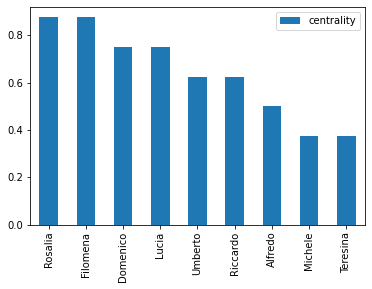

In [26]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False).plot(kind="bar")

In [27]:
import pandas as pd
import networkx as nx

# Assuming you have already created the graph G

# Calculate degree centrality
degree_dict = nx.degree_centrality(G)

# Create a DataFrame from the degree centrality dictionary
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['Centrality'])

# Sort the DataFrame by degree centrality in descending order
degree_df = degree_df.sort_values('Centrality', ascending=False)

# Reset the index to use the node IDs as a column
degree_df.reset_index(inplace=True)
degree_df = degree_df.rename(columns={'index': 'Node ID'})

# Display the DataFrame
print(degree_df)


    Node ID  Centrality
0   Rosalia       0.875
1  Filomena       0.875
2  Domenico       0.750
3     Lucia       0.750
4   Umberto       0.625
5  Riccardo       0.625
6   Alfredo       0.500
7   Michele       0.375
8  Teresina       0.375


<Axes: >

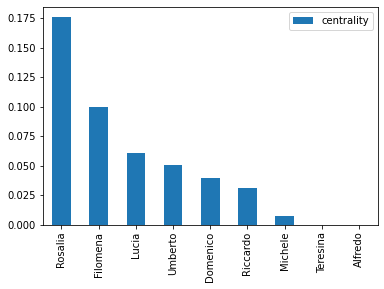

In [28]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False).plot(kind="bar")

In [29]:
import pandas as pd
import networkx as nx

# Assuming you have already created the graph G

# Calculate degree centrality
degree_dict = nx.betweenness_centrality(G)

# Create a DataFrame from the degree centrality dictionary
degree_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['Centrality'])

# Sort the DataFrame by degree centrality in descending order
degree_df = degree_df.sort_values('Centrality', ascending=False)

# Reset the index to use the node IDs as a column
degree_df.reset_index(inplace=True)
degree_df = degree_df.rename(columns={'index': 'Node ID'})

# Display the DataFrame
print(degree_df)


    Node ID  Centrality
0   Rosalia    0.175595
1  Filomena    0.099405
2     Lucia    0.060714
3   Umberto    0.050595
4  Domenico    0.039881
5  Riccardo    0.030952
6   Michele    0.007143
7  Teresina    0.000000
8   Alfredo    0.000000


<Axes: >

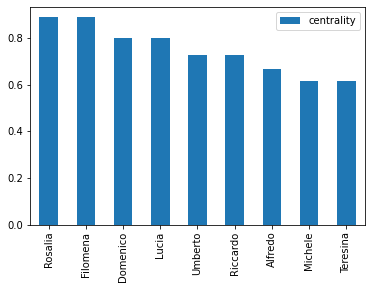

In [30]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False).plot(kind="bar")

In [31]:
import pandas as pd
import networkx as nx

# Assuming you have already created the graph G

# Calculate degree centrality
degree_dict = nx.closeness_centrality(G)

# Create a DataFrame from the degree centrality dictionary
degree_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['Centrality'])

# Sort the DataFrame by degree centrality in descending order
degree_df = degree_df.sort_values('Centrality', ascending=False)

# Reset the index to use the node IDs as a column
degree_df.reset_index(inplace=True)
degree_df = degree_df.rename(columns={'index': 'Node ID'})

# Display the DataFrame
print(degree_df)


    Node ID  Centrality
0   Rosalia    0.888889
1  Filomena    0.888889
2  Domenico    0.800000
3     Lucia    0.800000
4   Umberto    0.727273
5  Riccardo    0.727273
6   Alfredo    0.666667
7   Michele    0.615385
8  Teresina    0.615385


In [32]:
import community as community_louvain

In [33]:
communities = community_louvain.best_partition(G)

In [34]:
communities

{'Domenico': 1,
 'Rosalia': 1,
 'Filomena': 1,
 'Umberto': 0,
 'Riccardo': 0,
 'Michele': 0,
 'Teresina': 1,
 'Lucia': 1,
 'Alfredo': 1}

In [35]:
nx.set_node_attributes(G, communities, 'group')

In [36]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("Filumena_communities.html")

Filumena_communities.html
